# Load Benchmark Instances

In [1]:
from job_shop_lib.benchmarking import (
    load_all_benchmark_instances,
    load_benchmark_instance,
)

from job_shop_lib.constraint_programming import ORToolsSolver
from job_shop_lib.visualization.gantt import plot_gantt_chart
from job_shop_lib.visualization.graphs import plot_disjunctive_graph
from job_shop_lib.graphs import build_disjunctive_graph

In [2]:
benchmark_instances = load_all_benchmark_instances()
benchmark_instances

{'abz5': JobShopInstance(name=abz5, num_jobs=10, num_machines=10),
 'abz6': JobShopInstance(name=abz6, num_jobs=10, num_machines=10),
 'abz7': JobShopInstance(name=abz7, num_jobs=20, num_machines=15),
 'abz8': JobShopInstance(name=abz8, num_jobs=20, num_machines=15),
 'abz9': JobShopInstance(name=abz9, num_jobs=20, num_machines=15),
 'ft06': JobShopInstance(name=ft06, num_jobs=6, num_machines=6),
 'ft10': JobShopInstance(name=ft10, num_jobs=10, num_machines=10),
 'ft20': JobShopInstance(name=ft20, num_jobs=20, num_machines=5),
 'la01': JobShopInstance(name=la01, num_jobs=10, num_machines=5),
 'la02': JobShopInstance(name=la02, num_jobs=10, num_machines=5),
 'la03': JobShopInstance(name=la03, num_jobs=10, num_machines=5),
 'la04': JobShopInstance(name=la04, num_jobs=10, num_machines=5),
 'la05': JobShopInstance(name=la05, num_jobs=10, num_machines=5),
 'la06': JobShopInstance(name=la06, num_jobs=15, num_machines=5),
 'la07': JobShopInstance(name=la07, num_jobs=15, num_machines=5),
 'la0

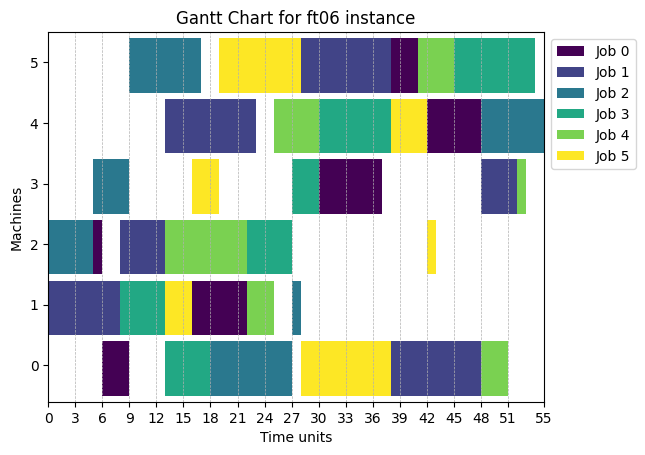

In [3]:
ft06 = load_benchmark_instance("ft06")
solution = ORToolsSolver(max_time_in_seconds=10).solve(ft06)
fig, ax = plot_gantt_chart(solution)

In [4]:
fig.savefig("ft06_solution.png", bbox_inches="tight")

In [5]:
solution.makespan()

55

In [6]:
ft06.metadata

{'optimum': 55,
 'upper_bound': 55,
 'lower_bound': 55,
 'reference': "J.F. Muth, G.L. Thompson. 'Industrial scheduling.', Englewood Cliffs, NJ, Prentice-Hall, 1963."}

In [7]:
import numpy as np
np.array(ft06.durations_matrix)

array([[ 1,  3,  6,  7,  3,  6],
       [ 8,  5, 10, 10, 10,  4],
       [ 5,  4,  8,  9,  1,  7],
       [ 5,  5,  5,  3,  8,  9],
       [ 9,  3,  5,  4,  3,  1],
       [ 3,  3,  9, 10,  4,  1]])

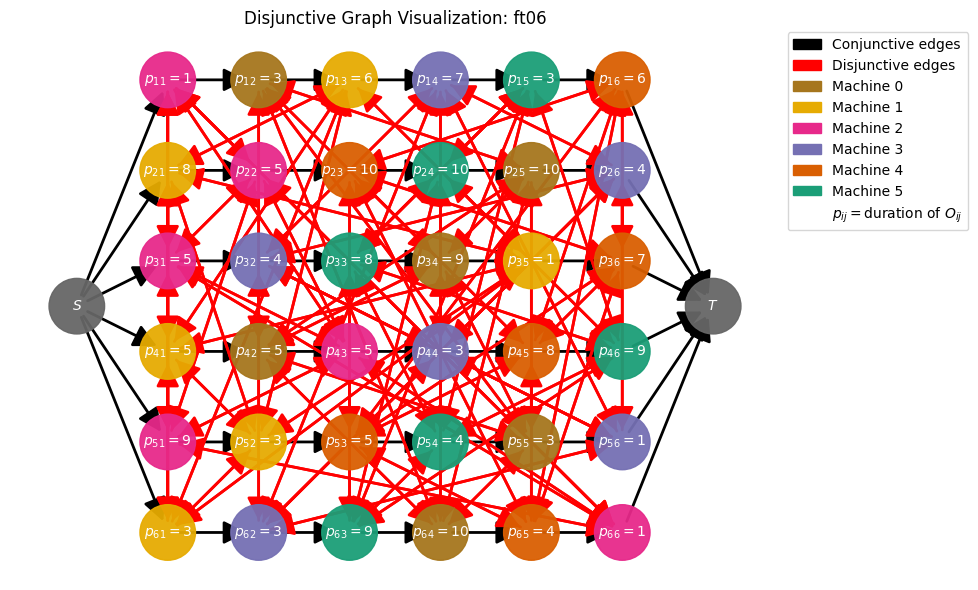

In [8]:
disjunctive_graph = build_disjunctive_graph(ft06)
_ = plot_disjunctive_graph(disjunctive_graph, figsize=(8, 6))